# Customer Lifetime Value (CLV) Analysis

Dalam notebook ini, kita akan melakukan analisis Customer Lifetime Value (CLV) menggunakan machine learning. Kita akan mengikuti beberapa tahapan utama untuk mempersiapkan dan membangun model untuk memprediksi CLV.

## 1. DATA UNDERSTANDING

Langkah pertama adalah mengumpulkan dataset dan memahami fitur-fitur yang ada dalam dataset. Fitur-fitur tersebut meliputi:
- Vehicle Class             : Tipe kendaraan yang dimiliki oleh pelanggan (misalnya mobil dua pintu, mobil empat pintu).
- Coverage                  : Jenis perlindungan asuransi yang dipilih pelanggan.
- Renew Offer Type          : Tipe penawaran yang diterima oleh pelanggan saat memperbarui polis mereka. Jenis penawaran ini dapat mempengaruhi keputusan pelanggan untuk memperpanjang atau mengakhiri polis.
- EmploymentStatus          : Status pekerjaan pelanggan (misalnya bekerja, pensiun). Status ini mempengaruhi pendapatan dan kemampuan pelanggan dalam membayar premi.
- Marital Status            : Status pernikahan pelanggan (misalnya menikah, lajang). Status pernikahan dapat memengaruhi risiko klaim dan kebutuhan perlindungan.
- Education                 : Tingkat pendidikan pelanggan. Pendidikan berkorelasi dengan pendapatan dan preferensi dalam memilih produk asuransi.
- Number of Policies        : Jumlah polis asuransi yang dimiliki pelanggan. Semakin banyak polis yang dimiliki, semakin besar loyalitas dan potensi CLV.
- Monthly Premium Auto      : Jumlah premi bulanan yang dibayar oleh pelanggan untuk asuransi mobil mereka. Premi ini adalah komponen langsung dalam penghitungan CLV.
- Total Claim Amount        : Jumlah total klaim yang diajukan oleh pelanggan selama berlangganan. Klaim yang tinggi dapat mengurangi margin keuntungan perusahaan.
- Income                    : Pendapatan tahunan pelanggan. Pendapatan yang lebih tinggi memungkinkan pelanggan memilih paket yang lebih mahal dan cakupan yang lebih luas, sehingga meningkatkan CLV.
- Customer Lifetime Value   : Nilai total pelanggan bagi perusahaan selama masa berlangganan mereka. Ini adalah variabel target yang diprediksi oleh model machine learning untuk membantu perusahaan memaksimalkan keuntungan dari setiap pelanggan.


Mari kita mulai dengan memuat dataset dan melihat beberapa baris pertama.

In [102]:
import pandas as pd
import numpy as np

# dataset
file_path = "data_customer_lifetime_value.csv"
df = pd.read_csv(file_path)

total_rows, total_columns = df.shape

# jumlah baris dan kolom
print(f"Number of Rows and Column : {df.shape}\n")

# tipe data tiap kolom
print(df.dtypes)

Number of Rows and Column : (5669, 11)

Vehicle Class               object
Coverage                    object
Renew Offer Type            object
EmploymentStatus            object
Marital Status              object
Education                   object
Number of Policies         float64
Monthly Premium Auto       float64
Total Claim Amount         float64
Income                     float64
Customer Lifetime Value    float64
dtype: object


In [103]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [104]:
display(
    df.describe(),  # .drop(columns=["id", "host_id", "latitude", "longitude"]),
    df.describe(include="object"),
    # df.groupby("room_type")[["price", "minimum_nights"]].describe(),
)

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


## 2. DATA CLEANING
Dalam langkah ini, kita akan menangani nilai yang hilang, mendeteksi outlier, dan memastikan konsistensi data. Mari kita periksa nilai yang hilang dan outlier.

<h3>Missing Values</h3>
Missing values dapat merusak integritas data dan mengurangi kualitas analisis, data yang tidak lengkap dapat menyebabkan hasil analisis yang tidak akurat.

In [105]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64


<h3>Duplicated Data</h3>
Kita perlu memeriksa setiap data duplikat dalam dataset karena dapat memengaruhi analisis

In [106]:
df_duplicates = df.duplicated().sum()
print(f"Jumlah kolom duplikat : {df_duplicates}\n")  # cek data duplikat

df[df.duplicated()].sort_values(by="Customer Lifetime Value").head()

Jumlah kolom duplikat : 618



,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
4883,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3524,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3673,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2675,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3968,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755


In [107]:
# Menghapus Baris Duplikat
df.drop_duplicates(inplace=True)

print(
    f"Jumlah kolom duplikat setelah cleaning : {df.duplicated().sum()}"
)  # cek kembali data duplikat
print(
    f"Persentase kolom terhapus : {(df_duplicates/total_rows*100):.2f}%"
)  # cek kembali data duplikat

Jumlah kolom duplikat setelah cleaning : 0
Persentase kolom terhapus : 10.90%


<h3>Data Anomali</h3>
Kita perlu memeriksa data anomali seperti total Income = 0 dan EmploymentStatus != 'Unemployed', karena tidak mungkin orang yang bekerja tidak memiliki Income

In [108]:
print(
    f'Jumah data Pekerja yang tidak memiliki Gaji : {len(df[(df["Income"] == 0) & (df["EmploymentStatus"] != "Unemployed")])}'
)
print(f'Jumah data Pengangguran : {len(df[(df["EmploymentStatus"] == "Unemployed")])}')

Jumah data Pekerja yang tidak memiliki Gaji : 0
Jumah data Pengangguran : 1332


Kita tidak akan menghapus data pengangguran yang tidak memiliki gaji, karena data tersebut diperlukan untuk analisis yang akan dilakukan nanti.

<h3>Outliers</h3>
Outliers dapat mempengaruhi analisis statistik dan model prediktif. Oleh karena itu, kita perlu memahami apakah mereka benar-benar signifikan atau hanya hasil dari kesalahan.

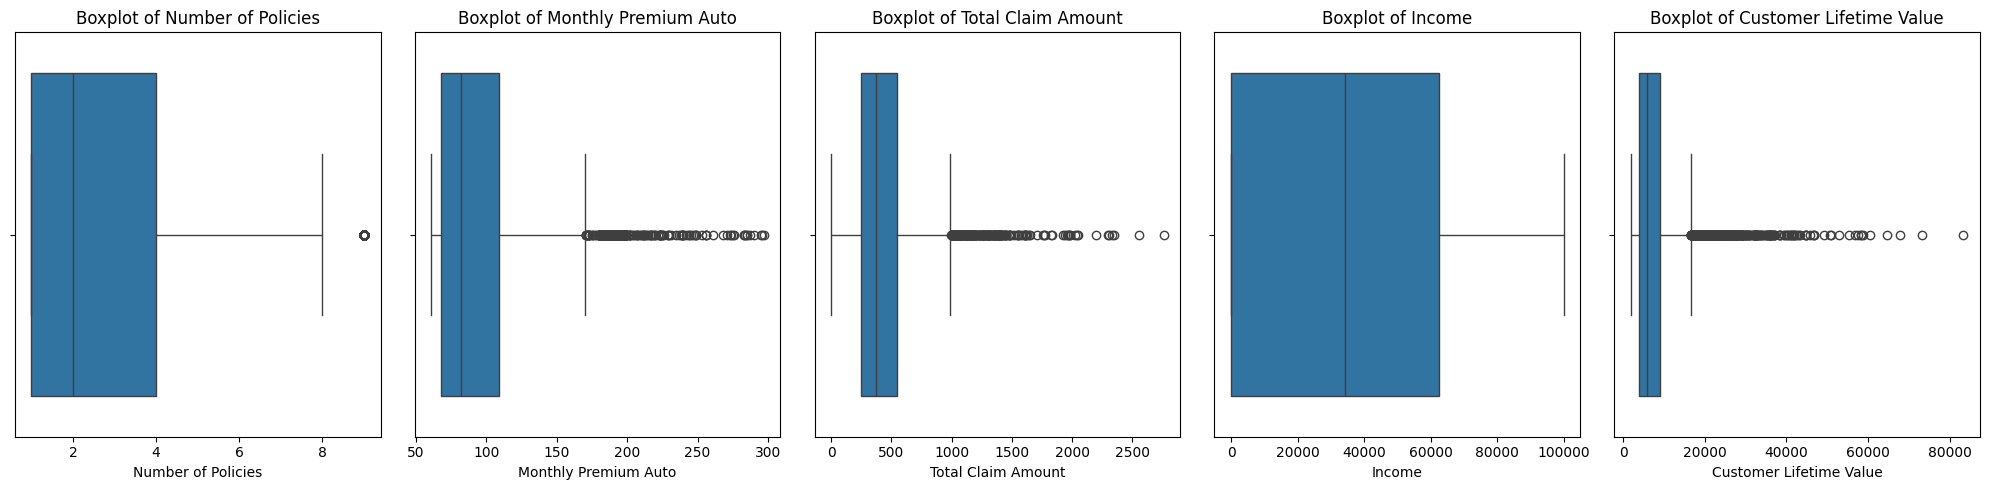

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur numerik
numerical_features = [
    "Number of Policies",
    "Monthly Premium Auto",
    "Total Claim Amount",
    "Income",
    "Customer Lifetime Value",
]

# Membuat boxplot untuk setiap fitur numerik
plt.figure(figsize=(20, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 5, i)  # Atur layout subplot
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

In [110]:
import pandas as pd

# Fitur numerik yang ingin dianalisis
numerical_features = [
    "Number of Policies",
    "Monthly Premium Auto",
    "Total Claim Amount",
    "Income",
    "Customer Lifetime Value",
]

# Inisialisasi DataFrame untuk data tanpa outlier
df_old = df.copy()

# Deteksi outlier dan bagi data
for feature in numerical_features:
    # Hitung Q1 (25th percentile) dan Q3 (75th percentile)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outlier
    outlier_condition = (df[feature] < lower_bound) | (df[feature] > upper_bound)

    # Hapus outlier dari df_cleaned
    df = df[~outlier_condition]

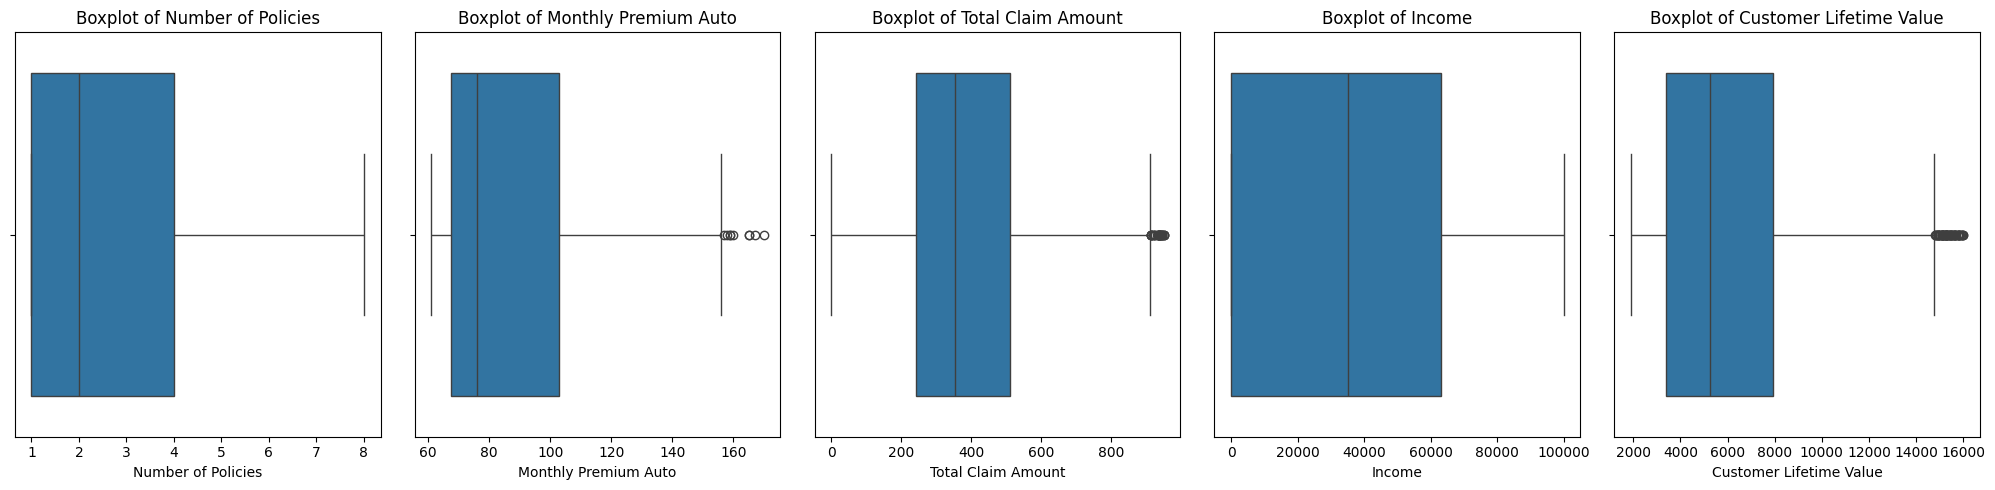

In [111]:
# Membuat boxplot untuk setiap fitur numerik
plt.figure(figsize=(20, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 5, i)  # Atur layout subplot
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

In [112]:
# df.to_excel("df_cleaned.xlsx", index=False)

## 3. Eksplorasi Data

Dalam langkah ini, kita akan melakukan analisis deskriptif dan visualisasi data untuk memahami distribusi dan hubungan antara fitur-fitur dalam dataset.

In [113]:
# Descriptive statistics
print(df.describe())

       Number of Policies  Monthly Premium Auto  Total Claim Amount  \
count         4075.000000           4075.000000         4075.000000   
mean             2.761472             85.398528          377.215133   
std              2.117797             21.720582          205.102459   
min              1.000000             61.000000            0.423310   
25%              1.000000             67.500000          243.572692   
50%              2.000000             76.000000          354.455466   
75%              4.000000            103.000000          511.200000   
max              8.000000            170.000000          950.400000   

             Income  Customer Lifetime Value  
count   4075.000000              4075.000000  
mean   38504.976687              6004.961765  
std    30646.548859              3119.034633  
min        0.000000              1898.007675  
25%        0.000000              3398.566435  
50%    35289.000000              5266.420543  
75%    63010.500000            

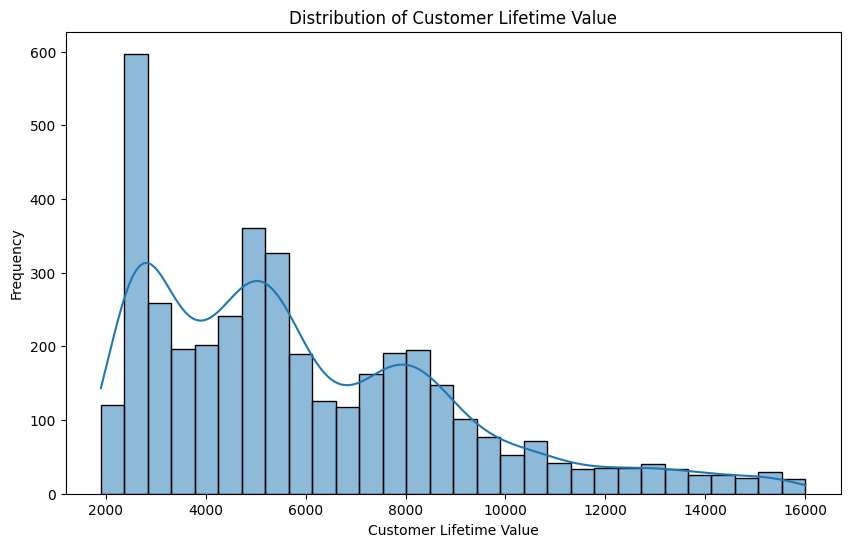

In [114]:
# Visualize distribution of CLV
plt.figure(figsize=(10, 6))
sns.histplot(df["Customer Lifetime Value"], bins=30, kde=True)
plt.title("Distribution of Customer Lifetime Value")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency")
plt.show()

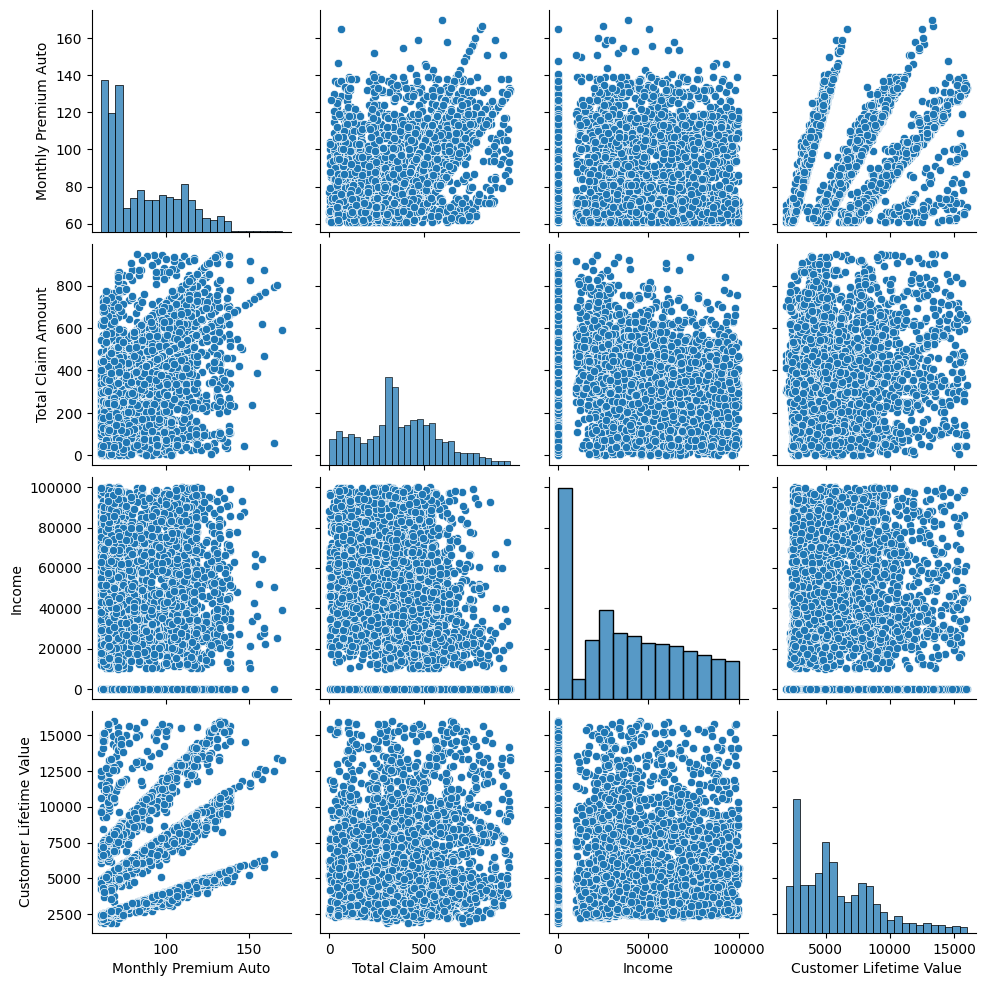

In [115]:
# Visualize relationship between features
sns.pairplot(
    df[
        [
            "Monthly Premium Auto",
            "Total Claim Amount",
            "Income",
            "Customer Lifetime Value",
        ]
    ]
)
plt.show()

## 4. Feature Engineering

Pada langkah ini, kita akan mengubah fitur kategorikal menjadi numerik, serta melakukan normalisasi dan pembuatan fitur baru jika diperlukan.

In [116]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# from category_encoders import OrdinalEncoder, BinaryEncoder
# Perbarui fitur kategorikal untuk mencocokkan nama kolom yang benar
numerical = [
    "Number of Policies",
    "Monthly Premium Auto",
    "Total Claim Amount",
    "Income",
]
categorical = [
    "Vehicle Class",
    "Coverage",
    "Renew Offer Type",
    "EmploymentStatus",
    "Marital Status",
    "Education",
]

# Definisikan preprocessing untuk fitur numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ("ss", StandardScaler(), numerical),
        ("ohe", OneHotEncoder(drop="first"), categorical),
    ],
    remainder="passthrough",  # Kolom yang tidak ditransformasi tetap muncul di output
)

# Terapkan preprocessing, pisahkan target dan fitur
X = df.drop("Customer Lifetime Value", axis=1)
y = df["Customer Lifetime Value"]

X_preprocessed = preprocessor.fit_transform(X)

## 5. Pembagian Data

Pisahkan data menjadi set pelatihan dan pengujian untuk melatih model dan menguji performanya.

In [117]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X_preprocessed, y, test_size=0.2, random_state=42
# )

# print("Data split into training and test sets.")

## 6. Pemilihan Model

Pilih model machine learning yang sesuai dan latih model tersebut dengan data pelatihan.

In [118]:
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor

# # Initialize and train models
# model_lr = LinearRegression()
# model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# model_lr.fit(X_train, y_train)
# model_rf.fit(X_train, y_train)

# print("Model training completed.")

## 7. Evaluasi Model

Evaluasi performa model menggunakan data pengujian dan metrik evaluasi yang sesuai.

In [119]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Predict and evaluate for Linear Regression
# y_pred_lr = model_lr.predict(X_test)
# mae_lr = mean_absolute_error(y_test, y_pred_lr)
# mse_lr = mean_squared_error(y_test, y_pred_lr)
# r2_lr = r2_score(y_test, y_pred_lr)

# # Predict and evaluate for Random Forest
# y_pred_rf = model_rf.predict(X_test)
# mae_rf = mean_absolute_error(y_test, y_pred_rf)
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# r2_rf = r2_score(y_test, y_pred_rf)

# print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
# print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

# print("Model evaluation completed.")

## 8. Tuning dan Optimasi

Lakukan tuning hyperparameter dan optimasi fitur untuk meningkatkan performa model.

In [120]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid for Random Forest
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 20, 30]
# }

# # Perform Grid Search
# grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# print('Best parameters:', grid_search.best_params_)

# print('Hyperparameter tuning and feature selection completed.')

## 9. Implementasi dan Interpretasi

Terapkan model pada data baru dan gunakan hasil model untuk mendapatkan wawasan bisnis yang berharga.

In [121]:
# # Predict using the best model
# y_pred_final = best_model.predict(X_test)

# # Example of interpretation
# print('Predictions for the first 5 customers:', y_pred_final[:5])

# print('Model implementation and interpretation completed.')